# Initial EDA on Detailed and Compact Results for both Women's Dataset and Men's Dataset

In [230]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# Loading the datasets

In [231]:
# Load the datasets using pandas
w_teams = pd.read_csv('WTeams.csv')
m_teams = pd.read_csv('MTeams.csv')
m_compact_results = pd.read_csv('MRegularSeasonCompactResults.csv')
w_compact_results = pd.read_csv('WRegularSeasonCompactResults.csv')
m_detailed_results = pd.read_csv('MRegularSeasonDetailedResults.csv')
w_detailed_results = pd.read_csv('WRegularSeasonDetailedResults.csv')
submission_stage1 = pd.read_csv('SampleSubmissionStage1.csv')
submission_stage2 = pd.read_csv('SampleSubmissionStage2.csv')
old_m = pd.read_csv('MNCAATourneyCompactResults.csv')
old_w = pd.read_csv('WNCAATourneyCompactResults.csv')

# Filtering for 2003 onwards

In [232]:
# # Filter compact results to only include 2003 and beyond
# m_compact_results = m_compact_results[m_compact_results['Season'] >= 2003]
# w_compact_results = w_compact_results[w_compact_results['Season'] >= 2003]

In [233]:
w_teams.head()

,TeamID,TeamName
0,3101,Abilene Chr
1,3102,Air Force
2,3103,Akron
3,3104,Alabama
4,3105,Alabama A&M


In [234]:
m_teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2025
1,1102,Air Force,1985,2025
2,1103,Akron,1985,2025
3,1104,Alabama,1985,2025
4,1105,Alabama A&M,2000,2025


In [235]:
m_compact_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0


In [236]:
w_compact_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1998,18,3104,91,3202,41,H,0
1,1998,18,3163,87,3221,76,H,0
2,1998,18,3222,66,3261,59,H,0
3,1998,18,3307,69,3365,62,H,0
4,1998,18,3349,115,3411,35,H,0


In [237]:
m_detailed_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [238]:
w_detailed_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2010,11,3103,63,3237,49,H,0,23,54,...,13,6,10,11,27,11,23,7,6,19
1,2010,11,3104,73,3399,68,N,0,26,62,...,21,14,27,14,26,7,20,4,2,27
2,2010,11,3110,71,3224,59,A,0,29,62,...,14,19,23,17,23,8,15,6,0,15
3,2010,11,3111,63,3267,58,A,0,27,52,...,26,16,25,22,22,15,11,14,5,14
4,2010,11,3119,74,3447,70,H,1,30,74,...,17,11,21,21,32,12,14,4,2,14


# Data Profiling

In [239]:
# create a data profiling function
def create_data_profiling_df(data: pd.DataFrame) -> pd.DataFrame:

    # create an empty dataframe to gather information about each column
    data_profiling_df = pd.DataFrame(columns = ["column_name",
                                                "column_type",
                                                "unique_values",
                                                "duplicate_values",
                                                "null_values",
                                                "max",
                                                "min",
                                                "range",
                                                "IQR"])

    # loop through each column to add rows to the data_profiling_df dataframe
    for column in data.columns:

        # create an empty dictionary to store the columns data
        column_dict = {}

        try:
            column_dict["column_name"] = [column]
            column_dict["column_type"] = [data[column].dtypes]
            column_dict["unique_values"] = [len(data[column].unique())]
            column_dict["duplicate_values"] = [(data[column].shape[0] - data[column].isna().sum()) - len(data[column].unique())]
            column_dict["null_values"] = [data[column].isna().sum()]
            column_dict["max"] = [data[column].max() if (data[column].dtypes != object) else "NA"]
            column_dict["min"] = [data[column].min() if (data[column].dtypes != object) else "NA"]
            column_dict["range"] = [data[column].max() - data[column].min() if (data[column].dtypes != object) else "NA"]
            column_dict["IQR"] = [data[column].quantile(.75) - data[column].quantile(.25) if (data[column].dtypes != object) else "NA"]

        except:
            print(f"unable to read column: {column}, you may want to drop this column")

        # add the information from the columns dict to the final dataframe
        data_profiling_df = pd.concat([data_profiling_df, pd.DataFrame(column_dict)],
                                      ignore_index = True)

    # sort the final dataframe by unique values descending
    data_profiling_df.sort_values(by = ['unique_values'],
                                  ascending = [False],
                                  inplace=True)

    # print the function is complete
    print(f"data profiling complete, dataframe contains {len(data_profiling_df)} columns")
    return data_profiling_df

In [240]:
# Perform data profiling on each DataFrame
w_teams_profile = create_data_profiling_df(w_teams)
m_teams_profile = create_data_profiling_df(m_teams)
m_compact_results_profile = create_data_profiling_df(m_compact_results)
w_compact_results_profile = create_data_profiling_df(w_compact_results)
m_detailed_results_profile = create_data_profiling_df(m_detailed_results)
w_detailed_results_profile = create_data_profiling_df(w_detailed_results)
submission_stage1_profile = create_data_profiling_df(submission_stage1)
submission_stage2_profile = create_data_profiling_df(submission_stage2)
old_m_profile = create_data_profiling_df(old_m)
old_w_profile = create_data_profiling_df(old_w)

data profiling complete, dataframe contains 2 columns
data profiling complete, dataframe contains 4 columns
data profiling complete, dataframe contains 8 columns
data profiling complete, dataframe contains 8 columns
data profiling complete, dataframe contains 34 columns
data profiling complete, dataframe contains 34 columns
data profiling complete, dataframe contains 2 columns
data profiling complete, dataframe contains 2 columns
data profiling complete, dataframe contains 8 columns
data profiling complete, dataframe contains 8 columns


In [241]:
# Display the profiling results
print("\nWTeams Data Profiling")
w_teams_profile


WTeams Data Profiling


,column_name,column_type,unique_values,duplicate_values,null_values,max,min,range,IQR
0,TeamID,int64,378,0,0,3480,3101,379,188.5
1,TeamName,object,378,0,0,NA,NA,NA,NA


In [242]:
print("\nMTeams Data Profiling")
m_teams_profile


MTeams Data Profiling


,column_name,column_type,unique_values,duplicate_values,null_values,max,min,range,IQR
0,TeamID,int64,380,0,0,1480,1101,379,189.5
1,TeamName,object,380,0,0,NA,NA,NA,NA
2,FirstD1Season,int64,32,348,0,2025,1985,40,1.25
3,LastD1Season,int64,14,366,0,2025,1985,40,0.0


In [243]:
print("\nMRegularSeasonCompactResults Data Profiling")
m_compact_results_profile


MRegularSeasonCompactResults Data Profiling


,column_name,column_type,unique_values,duplicate_values,null_values,max,min,range,IQR
2,WTeamID,int64,380,191416,0,1480,1101,379,181.0
4,LTeamID,int64,380,191416,0,1480,1101,379,184.0
1,DayNum,int64,133,191663,0,132,0,132,58.0
3,WScore,int64,130,191666,0,186,34,152,15.0
5,LScore,int64,119,191677,0,150,20,130,15.0
0,Season,int64,41,191755,0,2025,1985,40,20.0
7,NumOT,int64,7,191789,0,6,0,6,0.0
6,WLoc,object,3,191793,0,NA,NA,NA,NA


In [244]:
print("\nWRegularSeasonCompactResults Data Profiling")
w_compact_results_profile


WRegularSeasonCompactResults Data Profiling


,column_name,column_type,unique_values,duplicate_values,null_values,max,min,range,IQR
2,WTeamID,int64,369,135579,0,3480,3101,379,181.0
4,LTeamID,int64,369,135579,0,3480,3101,379,184.0
1,DayNum,int64,133,135815,0,132,0,132,61.0
3,WScore,int64,105,135843,0,140,30,110,15.0
5,LScore,int64,103,135845,0,130,11,119,14.0
0,Season,int64,28,135920,0,2025,1998,27,14.0
7,NumOT,int64,6,135942,0,5,0,5,0.0
6,WLoc,object,3,135945,0,NA,NA,NA,NA


In [245]:
print("\nMRegularSeasonDetailedResults Data Profiling")
m_detailed_results_profile


MRegularSeasonDetailedResults Data Profiling


,column_name,column_type,unique_values,duplicate_values,null_values,max,min,range,IQR
2,WTeamID,int64,371,117377,0,1480,1101,379,182.0
4,LTeamID,int64,371,117377,0,1480,1101,379,182.0
1,DayNum,int64,133,117615,0,132,0,132,61.0
5,LScore,int64,105,117643,0,144,20,124,14.0
3,WScore,int64,104,117644,0,149,34,115,15.0
22,LFGA,int64,75,117673,0,106,26,80,10.0
9,WFGA,int64,73,117675,0,103,26,77,9.0
13,WFTA,int64,66,117682,0,67,0,67,11.0
26,LFTA,int64,61,117687,0,65,0,65,9.0
24,LFGA3,int64,57,117691,0,59,1,58,8.0


In [246]:
print("\nWRegularSeasonDetailedResults Data Profiling")
w_detailed_results_profile


WRegularSeasonDetailedResults Data Profiling


,column_name,column_type,unique_values,duplicate_values,null_values,max,min,range,IQR
2,WTeamID,int64,366,80260,0,3480,3101,379,180.0
4,LTeamID,int64,366,80260,0,3480,3101,379,182.0
1,DayNum,int64,133,80493,0,132,0,132,65.0
3,WScore,int64,104,80522,0,140,30,110,15.0
5,LScore,int64,100,80526,0,130,11,119,14.0
22,LFGA,int64,80,80546,0,111,25,86,10.0
9,WFGA,int64,77,80549,0,113,30,83,11.0
13,WFTA,int64,61,80565,0,66,0,66,10.0
24,LFGA3,int64,60,80566,0,80,0,80,9.0
11,WFGA3,int64,58,80568,0,63,0,63,9.0


In [247]:
print("\nMNCAATourneyCompactResults Data Profiling")
old_m_profile


MNCAATourneyCompactResults Data Profiling


,column_name,column_type,unique_values,duplicate_values,null_values,max,min,range,IQR
4,LTeamID,int64,309,2209,0,1463,1101,362,178.0
2,WTeamID,int64,217,2301,0,1463,1101,362,178.0
3,WScore,int64,78,2440,0,149,43,106,15.0
5,LScore,int64,73,2445,0,115,29,86,14.0
0,Season,int64,39,2479,0,2024,1985,39,19.75
1,DayNum,int64,15,2503,0,154,134,20,3.0
7,NumOT,int64,4,2514,0,3,0,3,0.0
6,WLoc,object,1,2517,0,NA,NA,NA,NA


In [248]:
print("\nWNCAATourneyCompactResults Data Profiling")
old_w_profile


WNCAATourneyCompactResults Data Profiling


,column_name,column_type,unique_values,duplicate_values,null_values,max,min,range,IQR
4,LTeamID,int64,279,1371,0,3465,3101,364,169.0
2,WTeamID,int64,132,1518,0,3464,3104,360,176.0
3,WScore,int64,67,1583,0,140,47,93,15.0
5,LScore,int64,67,1583,0,100,21,79,15.0
0,Season,int64,26,1624,0,2024,1998,26,13.0
1,DayNum,int64,16,1634,0,155,135,20,3.0
6,WLoc,object,3,1647,0,NA,NA,NA,NA
7,NumOT,int64,3,1647,0,2,0,2,0.0


# EDA

# Women's Dataset

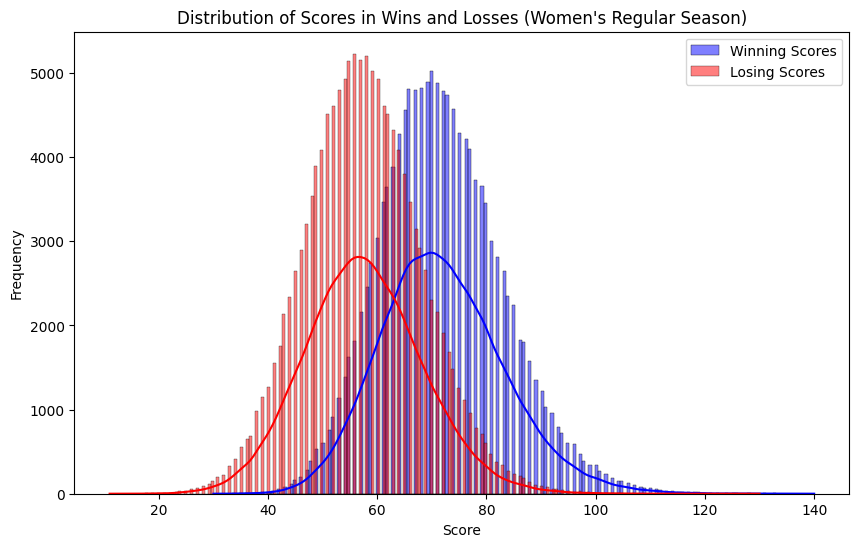

In [249]:
# Distribution of points in wins and losses for women's regular season games
plt.figure(figsize=(10, 6))
sns.histplot(w_compact_results['WScore'], kde=True, color='blue', label='Winning Scores')
sns.histplot(w_compact_results['LScore'], kde=True, color='red', label='Losing Scores')
plt.title('Distribution of Scores in Wins and Losses (Women\'s Regular Season)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

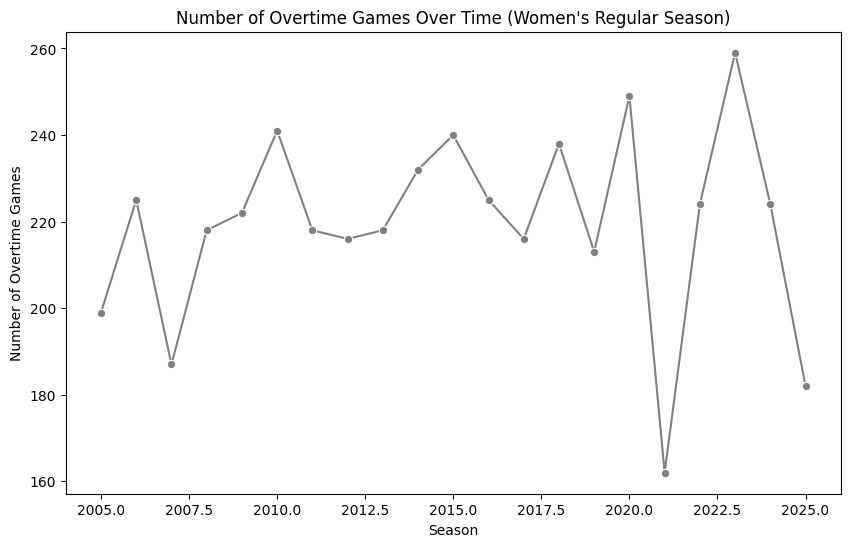

In [250]:
# Number of Overtime Games Over Time (Women)
overtime_games_w = w_compact_results[w_compact_results['NumOT'] > 0].groupby('Season').size().reset_index(name='OvertimeGames')
plt.figure(figsize=(10, 6))
sns.lineplot(data=overtime_games_w, x='Season', y='OvertimeGames', marker='o', color = 'gray')
plt.title('Number of Overtime Games Over Time (Women\'s Regular Season)')
plt.xlabel('Season')
plt.ylabel('Number of Overtime Games')
plt.show()

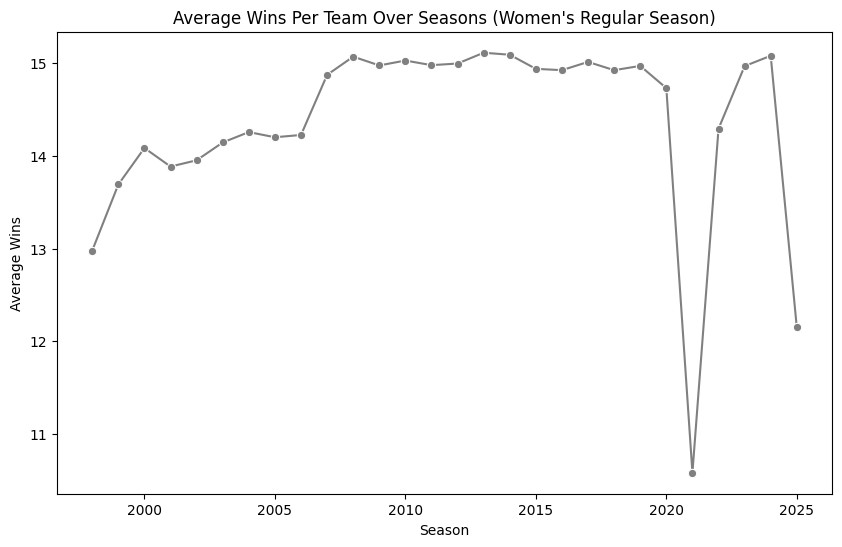

In [251]:
# Team Performance Over Seasons (Women)
team_performance_w = w_compact_results.groupby(['Season', 'WTeamID']).size().reset_index(name='Wins')
team_performance_w = team_performance_w.groupby('Season')['Wins'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=team_performance_w, x='Season', y='Wins', marker='o', color = 'gray')
plt.title('Average Wins Per Team Over Seasons (Women\'s Regular Season)')
plt.xlabel('Season')
plt.ylabel('Average Wins')
plt.show()

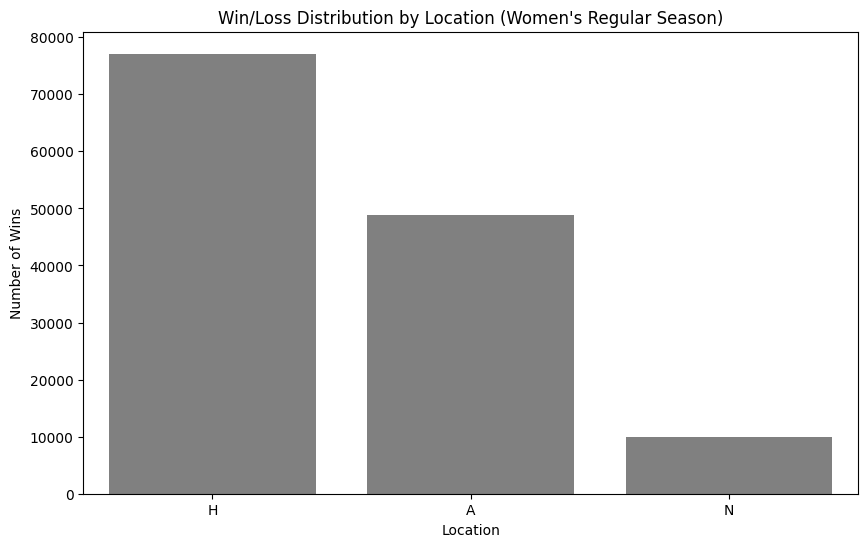

In [252]:
# Win/Loss Distribution by Location (Women) sorted by descending order
location_w = w_compact_results.groupby('WLoc').size().reset_index(name='Wins')
location_w = location_w.sort_values(by='Wins', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=location_w, x='WLoc', y='Wins', color='gray')
plt.title('Win/Loss Distribution by Location (Women\'s Regular Season)')
plt.xlabel('Location')
plt.ylabel('Number of Wins')
plt.show()

#### H - Home
#### A - Away
#### N - Neutral

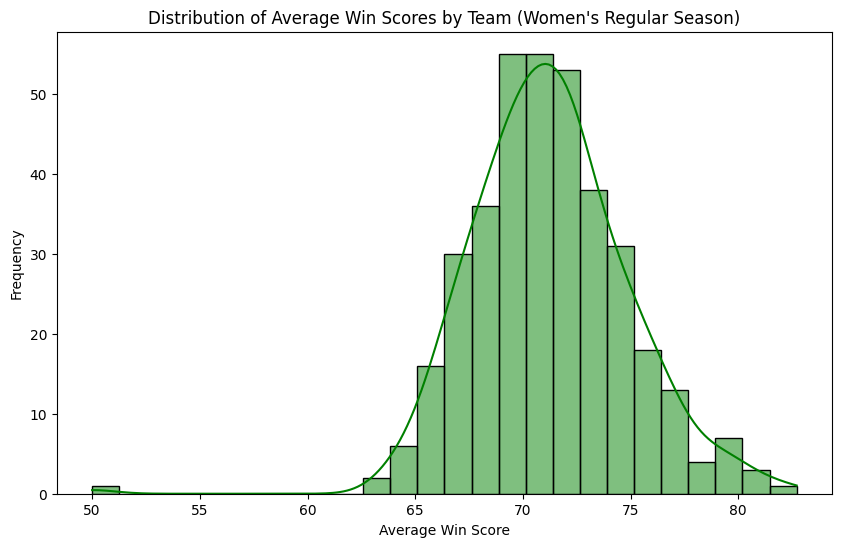

In [253]:
# Average Score by Team (Women)
average_scores_w = w_compact_results.groupby('WTeamID')['WScore'].mean().reset_index(name='AverageWinScore')
plt.figure(figsize=(10, 6))
sns.histplot(average_scores_w['AverageWinScore'], kde=True, color='green')
plt.title('Distribution of Average Win Scores by Team (Women\'s Regular Season)')
plt.xlabel('Average Win Score')
plt.ylabel('Frequency')
plt.show()

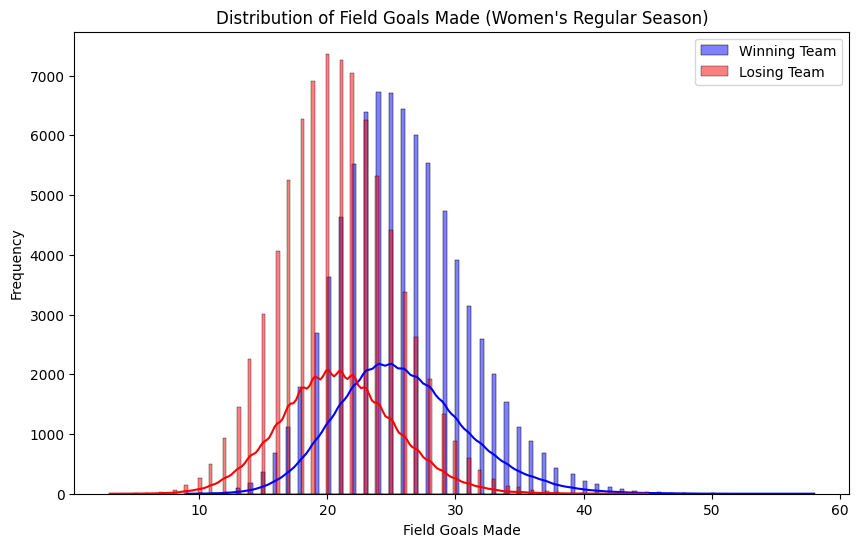

In [254]:
# Women's FGM Distribution
plt.figure(figsize=(10, 6))
sns.histplot(w_detailed_results['WFGM'], kde=True, color='blue', label='Winning Team')
sns.histplot(w_detailed_results['LFGM'], kde=True, color='red', label='Losing Team')
plt.title('Distribution of Field Goals Made (Women\'s Regular Season)')
plt.xlabel('Field Goals Made')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Men's Dataset

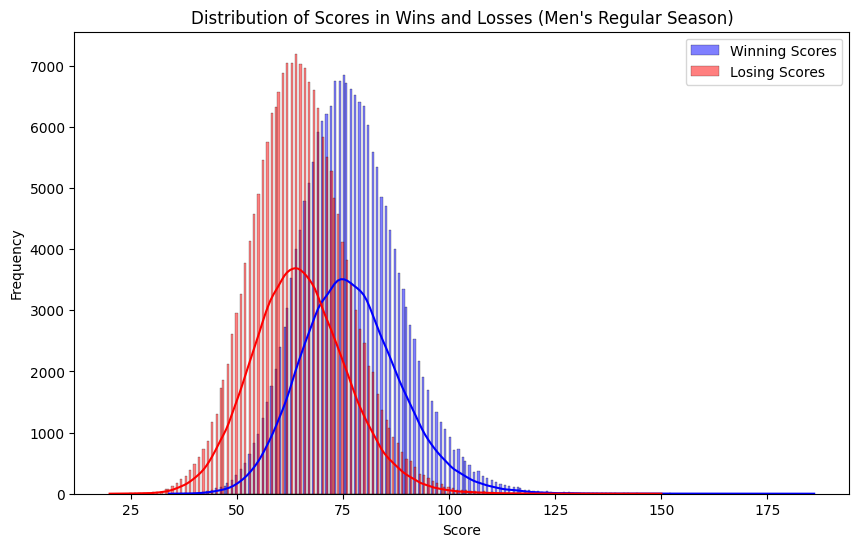

In [255]:
# Distribution of points in wins and losses for men's regular season games
plt.figure(figsize=(10, 6))
sns.histplot(m_compact_results['WScore'], kde=True, color='blue', label='Winning Scores')
sns.histplot(m_compact_results['LScore'], kde=True, color='red', label='Losing Scores')
plt.title('Distribution of Scores in Wins and Losses (Men\'s Regular Season)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

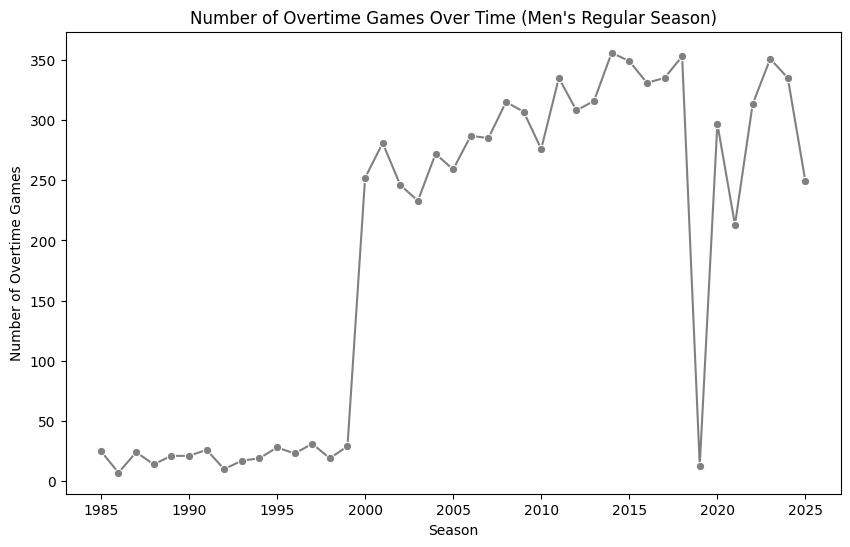

In [256]:
# Number of Overtime Games Over Time
overtime_games = m_compact_results[m_compact_results['NumOT'] > 0].groupby('Season').size().reset_index(name='OvertimeGames')
plt.figure(figsize=(10, 6))
sns.lineplot(data=overtime_games, x='Season', y='OvertimeGames', marker='o', color = 'gray')
plt.title('Number of Overtime Games Over Time (Men\'s Regular Season)')
plt.xlabel('Season')
plt.ylabel('Number of Overtime Games')
plt.show()

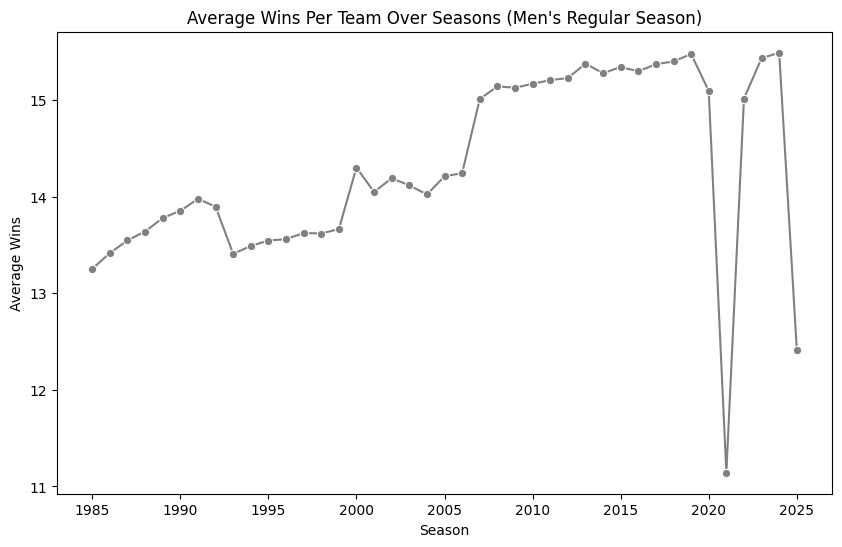

In [257]:
# Team Performance Over Seasons
team_performance = m_compact_results.groupby(['Season', 'WTeamID']).size().reset_index(name='Wins')
team_performance = team_performance.groupby('Season')['Wins'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=team_performance, x='Season', y='Wins', marker='o', color = 'gray')
plt.title('Average Wins Per Team Over Seasons (Men\'s Regular Season)')
plt.xlabel('Season')
plt.ylabel('Average Wins')
plt.show()

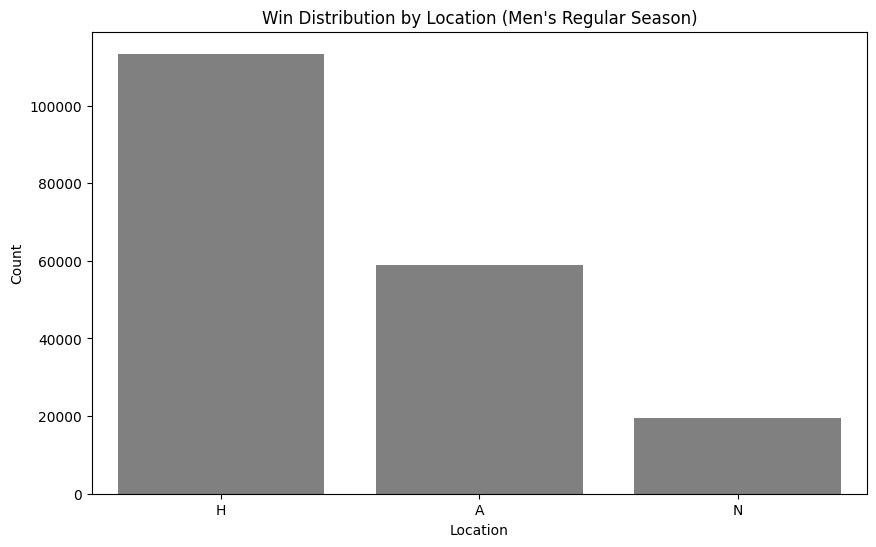

In [258]:
# Win/Loss Distribution by Location sort highest to lowest
plt.figure(figsize=(10, 6))
sns.countplot(data=m_compact_results, x='WLoc', order=m_compact_results['WLoc'].value_counts().index, color='gray')
plt.title('Win Distribution by Location (Men\'s Regular Season)')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

#### H - Home
#### A - Away
### N - Neutral

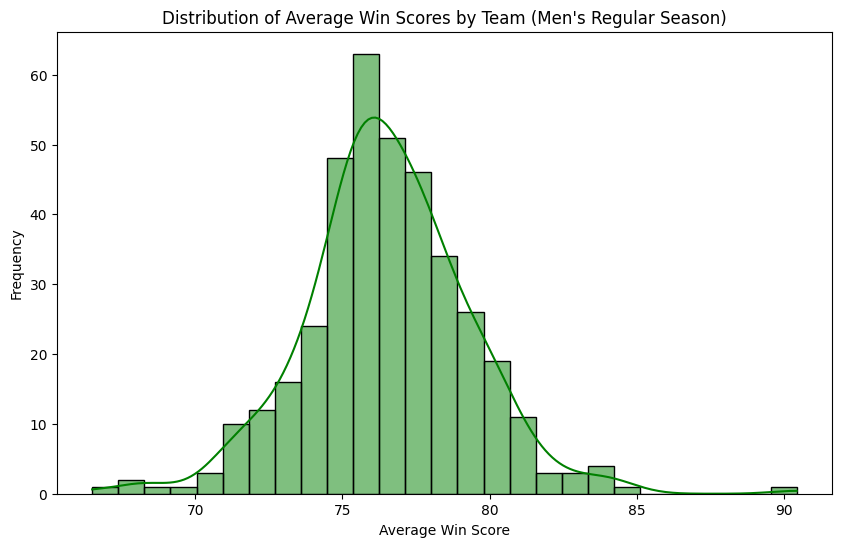

In [259]:
# Average Score by Team
average_scores = m_compact_results.groupby('WTeamID')['WScore'].mean().reset_index(name='AverageWinScore')
plt.figure(figsize=(10, 6))
sns.histplot(average_scores['AverageWinScore'], kde=True, color='green')
plt.title('Distribution of Average Win Scores by Team (Men\'s Regular Season)')
plt.xlabel('Average Win Score')
plt.ylabel('Frequency')
plt.show()

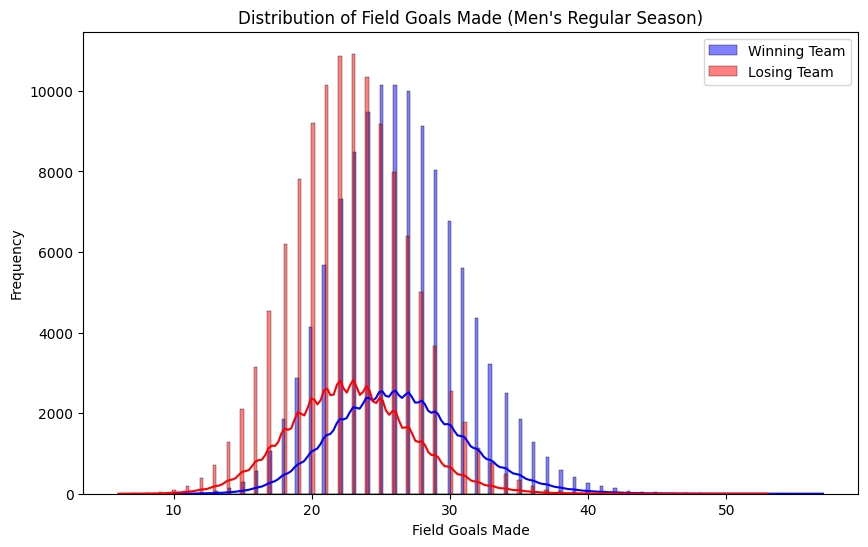

In [260]:
# Men's FGM Distribution
plt.figure(figsize=(10, 6))
sns.histplot(m_detailed_results['WFGM'], kde=True, color='blue', label='Winning Team')
sns.histplot(m_detailed_results['LFGM'], kde=True, color='red', label='Losing Team')
plt.title('Distribution of Field Goals Made (Men\'s Regular Season)')
plt.xlabel('Field Goals Made')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Feature Engineering

## Went crazy here :3

In [261]:
# Function to calculate average stats and integrate with original DataFrame
def calculate_and_integrate_features(teams, detailed_results):
    # Calculate average stats
    avg_stats = detailed_results.groupby('WTeamID').agg(
        AvgPointsScored=('WScore', 'mean'),
        AvgPointsConceded=('LScore', 'mean'),
        AvgFGM=('WFGM', 'mean'),
        AvgFGA=('WFGA', 'mean'),
        AvgFGM3=('WFGM3', 'mean'),
        AvgFGA3=('WFGA3', 'mean'),
        AvgFTM=('WFTM', 'mean'),
        AvgFTA=('WFTA', 'mean'),
        AvgOR=('WOR', 'mean'),
        AvgDR=('WDR', 'mean'),
        AvgAst=('WAst', 'mean'),
        AvgTO=('WTO', 'mean'),
        AvgStl=('WStl', 'mean'),
        AvgBlk=('WBlk', 'mean'),
        AvgPF=('WPF', 'mean')
    ).reset_index()

    avg_stats.columns = ['TeamID'] + [f'{col}_W' for col in avg_stats.columns[1:]]

    loss_stats = detailed_results.groupby('LTeamID').agg(
        AvgPointsScored=('LScore', 'mean'),
        AvgPointsConceded=('WScore', 'mean'),
        AvgFGM=('LFGM', 'mean'),
        AvgFGA=('LFGA', 'mean'),
        AvgFGM3=('LFGM3', 'mean'),
        AvgFGA3=('LFGA3', 'mean'),
        AvgFTM=('LFTM', 'mean'),
        AvgFTA=('LFTA', 'mean'),
        AvgOR=('LOR', 'mean'),
        AvgDR=('LDR', 'mean'),
        AvgAst=('LAst', 'mean'),
        AvgTO=('LTO', 'mean'),
        AvgStl=('LStl', 'mean'),
        AvgBlk=('LBlk', 'mean'),
        AvgPF=('LPF', 'mean')
    ).reset_index()

    loss_stats.columns = ['TeamID'] + [f'{col}_L' for col in loss_stats.columns[1:]]

    avg_stats = avg_stats.merge(loss_stats, how='left', on='TeamID')

    # Calculate efficiency metrics
    avg_stats['FG_Percentage_W'] = avg_stats['AvgFGM_W'] / avg_stats['AvgFGA_W']
    avg_stats['FG_Percentage_L'] = avg_stats['AvgFGM_L'] / avg_stats['AvgFGA_L']
    avg_stats['FT_Percentage_W'] = avg_stats['AvgFTM_W'] / avg_stats['AvgFTA_W']
    avg_stats['FT_Percentage_L'] = avg_stats['AvgFTM_L'] / avg_stats['AvgFTA_L']
    avg_stats['3P_Percentage_W'] = avg_stats['AvgFGM3_W'] / avg_stats['AvgFGA3_W']
    avg_stats['3P_Percentage_L'] = avg_stats['AvgFGM3_L'] / avg_stats['AvgFGA3_L']

    # Create aggregated features
    avg_stats['TotalPointsScored'] = avg_stats['AvgPointsScored_W'] + avg_stats['AvgPointsScored_L']
    avg_stats['TotalPointsConceded'] = avg_stats['AvgPointsConceded_W'] + avg_stats['AvgPointsConceded_L']
    avg_stats['TotalRebounds'] = avg_stats['AvgOR_W'] + avg_stats['AvgDR_W'] + avg_stats['AvgOR_L'] + avg_stats['AvgDR_L']

    # Merge features into the original DataFrame and drop used columns
    teams = teams.merge(avg_stats, how='left', on='TeamID')

    # List of columns to drop
    drop_columns = ['AvgPointsScored_W', 'AvgPointsConceded_W', 'AvgFGM_W', 'AvgFGA_W', 'AvgFGM3_W', 'AvgFGA3_W', 
                    'AvgFTM_W', 'AvgFTA_W', 'AvgOR_W', 'AvgDR_W', 'AvgAst_W', 'AvgTO_W', 'AvgStl_W', 'AvgBlk_W', 'AvgPF_W',
                    'AvgPointsScored_L', 'AvgPointsConceded_L', 'AvgFGM_L', 'AvgFGA_L', 'AvgFGM3_L', 'AvgFGA3_L', 
                    'AvgFTM_L', 'AvgFTA_L', 'AvgOR_L', 'AvgDR_L', 'AvgAst_L', 'AvgTO_L', 'AvgStl_L', 'AvgBlk_L', 'AvgPF_L']

    teams.drop(columns=drop_columns, inplace=True)

    return teams

In [262]:
# Calculate and integrate features for men's and women's data
m_team_features = calculate_and_integrate_features(m_teams, m_detailed_results)
w_team_features = calculate_and_integrate_features(w_teams, w_detailed_results)

In [263]:
m_team_features.head()

,TeamID,TeamName,FirstD1Season,LastD1Season,FG_Percentage_W,FG_Percentage_L,FT_Percentage_W,FT_Percentage_L,3P_Percentage_W,3P_Percentage_L,TotalPointsScored,TotalPointsConceded,TotalRebounds
0,1101,Abilene Chr,2014,2025,0.472488,0.404569,0.732399,0.703606,0.381649,0.319719,140.302719,141.897799,60.027432
1,1102,Air Force,1985,2025,0.491691,0.417169,0.720879,0.671455,0.403407,0.320854,129.096422,129.300856,56.157358
2,1103,Akron,1985,2025,0.467589,0.401460,0.697779,0.693533,0.378240,0.311001,141.417659,138.244248,67.389536
3,1104,Alabama,1985,2025,0.468260,0.410815,0.705067,0.691841,0.360777,0.304987,143.983232,139.627781,72.301514
4,1105,Alabama A&M,2000,2025,0.436419,0.380389,0.684723,0.646627,0.340522,0.284371,133.948235,138.397706,70.771444


In [264]:
w_team_features.head()

,TeamID,TeamName,FG_Percentage_W,FG_Percentage_L,FT_Percentage_W,FT_Percentage_L,3P_Percentage_W,3P_Percentage_L,TotalPointsScored,TotalPointsConceded,TotalRebounds
0,3101,Abilene Chr,0.459141,0.380932,0.730769,0.703817,0.356929,0.284866,137.256158,134.688287,69.262999
1,3102,Air Force,0.420091,0.345493,0.734075,0.662328,0.341671,0.271248,123.029795,129.086935,67.883244
2,3103,Akron,0.440812,0.379315,0.735572,0.701172,0.347894,0.297030,136.385772,136.562466,73.211859
3,3104,Alabama,0.439768,0.355093,0.690204,0.648953,0.349348,0.273279,133.292348,129.496139,74.266883
4,3105,Alabama A&M,0.419029,0.346321,0.685693,0.640564,0.318124,0.242424,121.882890,127.136192,73.476844
